Created by Olivia Williams, FFHS 19

# Teil 3 der Semesterarbeit: Codierungstheorie

Import der Library numpy, um mit Matrizen rechnen zu können.

In [1]:
import numpy as np

Anhand des Venn-Diagramm soll von einem Hamming Code (7,4) die Generatormatrix und die zugehörige Prüfmatrix erstellt werden. Anschliessend wird erfolgreich codiert und decodiert. Des Weiteren soll ein Beispiel eines verfälschten codierten Wortes gezeigt werden (beispielsweise Fehler bei der Datenübertragung) und wie anhand des Fehlers die Korrektur vorgenommen werden kann.

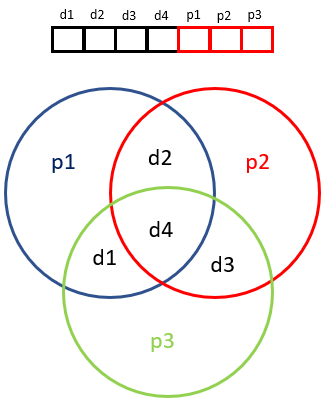

Der Code ist 7 bit lang, davon sind 4 die Daten-Bits und 3 davon sind die Parity-Bits. Die Daten-Bits tragen die eigentlich zu lesende Information, die Parity-Bits werden für die Überprüfung der Daten-Bits verwendet, um zu sehen, ob diese korrekt vom Sender zum Empfänger übermittelt wurden.

Im Venn-Diagramm ist zu erkennen, dass jedes Parity-Bit einen Kreis formt und für bestimmte Daten-Bits zuständig ist. Parity-Bit p1 kontrolliert Daten-Bit d1, d2 und d4, Parity-Bit p2 kontrolliert Daten-Bit d2, d3 und d4, Parity-Bit p3 kontrolliert Daten-Bit d1, d3 und d4.

Anhand dieser Informationen kann nun die Generatormatrix erstellt werden.

# Die Generatormatrix

Da es sich um einen Hamming Code (7,4) handelt, hat die Generatomatrix 4 Spalten und 7 Zeilen. Die ersten vier Spalten werden mit der Identitätsmatrix besetzt. Die Identitätsmatrix sorgt hier dafür, dass das Codewort selbst sich in der Nachricht repräsentieren kann. Denn eine Multiplikation mit der Identitätsmatrix ergibt sich selbst als Resultat.

In [2]:
array_gen_id = np.identity(4)

In [3]:
print(array_gen_id)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Anschliessend wird die Matrix um drei Zeilen erweitert. Diese drei hinzugefügten Zeilen tragen entsprechend dem Venn-Diagramm eine eins an den bestimmen Stellen. Die erste Zeile enstspricht p1, dass heisst der Eintrag lautet (1,1,0,1). Weshalb? Gemäss dem Venn-Diagramm ist d3 nicht im Kreis von p1 und daher enthält die Stelle der Zeile eine null. So wird auch mit den nächsten zwei Zeilen fortgefahren: (0,1,1,1) und (1,0,1,1).
Insgesamt wird also die Matrix um die Einträge (1,1,0,1), (0,1,1,1) und (1,0,1,1) erweitert. Axis=0 bedeutet, dass es sich hier um Zeilen handelt. Axis=1 wären dann die Spalten.

In [4]:
array_gen = np.append(array_gen_id, [[1, 1, 0, 1],[0, 1, 1, 1],[1, 0, 1, 1]], axis=0)

In [5]:
print(array_gen)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]


# Die Prüfmatrix

Die Prüfmatrix hat 7 Spalten und 3 Zeilen. 7 Zeilen müssen es sein, da das codierte Wort ebenfalls derselben Länge entspricht, was ja für die Multipikation vorgegeben werden muss, ansonsten würde die Matrix Multiplikation nicht funktionieren. 

Um die Prüfmatrix aufzubauen werden separat zwei Matrizen gebildet und dann zusammengefügt. Die erste Matrix entspricht den hinzugefügten Zeilen aus der Generatormatrix (1,1,0,1), (0,1,1,1) und (1,0,1,1). Die zweite Matrix entspricht der Identitätsmatrix.

Zuerst wird die erste Matrix mit 0 erstellt.

In [6]:
array_pruef1 = np.zeros((3,4))

In [7]:
print(array_pruef1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Der ersten Matrix werden dann die oben erwähnten Zeilen hinzugefügt.

In [8]:
array_pruef1_added = np.append(array_pruef1, [[1, 1, 0, 1],[0, 1, 1, 1],[1, 0, 1, 1]], axis=0)

In [9]:
print(array_pruef1_added)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]


Anschliessend werden die ersten drei Zeilen wieder entfernt. Die erste 0 entspricht der ersten Zeile und die zweite 0 gibt an, dass es sich um Zeilen handelt. Mit einer 1 könnten also auch Spalten manipuliert werden.

In [10]:
a_del = np.delete(array_pruef1_added, 0, 0)

In [11]:
a_del = np.delete(a_del, 0, 0)

In [12]:
array_pruef1 = np.delete(a_del, 0, 0)

In [13]:
print(array_pruef1)

[[1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]


Die zweite Matrix besteht aus der Identitätsmatrix.

In [14]:
array_pruef2 = np.identity(3)

In [15]:
print(array_pruef2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Nun werden die zweit Matrizen zusammengefügt. Mit axis=1 soll angegeben werden, dass die zwei Matrizen horizontal angeordnet werden.

In [16]:
array_pruef = np.concatenate((array_pruef1, array_pruef2), axis=1)

In [17]:
print(array_pruef)

[[1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1.]]


# Codierung

Nun soll ein Rohwort ausgewählt werden und mit der Generatormatrix multipliziert werden.

Das Rohwort lautet: 1 0 1 0

Zuerst wird eine Matrix mit 0 erstellt.

In [18]:
raw_code1 = np.zeros((4,1))

In [19]:
print(raw_code1)

[[0.]
 [0.]
 [0.]
 [0.]]


Anschliessend wird das Rohwort hinzugefügt.

In [20]:
raw_code = np.append(raw_code1, [[1], [0], [1], [0]], axis=1)

In [21]:
print (raw_code)

[[0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


Dann werden die vier 0 auf der linken Seite entfernt.

In [22]:
raw_code = np.delete(raw_code, 0, 1)

In [23]:
print(raw_code)

[[1.]
 [0.]
 [1.]
 [0.]]


Nun soll das Rohwort mit der Generatormatix multipliziert werden.

Multiplikation mit der Generatormatrix:

In [24]:
code_word = np.matmul(array_gen, raw_code)

In [25]:
print(code_word)

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]]


Es sollen nun die drei Parity-Bits [4][0], [5][0] und [6][0] vom Codewort mit dem Modulo überprüft werden. Sollten die Einträge nicht stimmen, wird angepasst.

In [26]:
if code_word[4][0] % 2 == 1:
    code_word[4][0]=1
if code_word[4][0] % 2 == 0:
    code_word[4][0]=0
    
if code_word[5][0] % 2 == 1:
    code_word[5][0]=1
if code_word[5][0] % 2 == 0:
    code_word[5][0]=0

if code_word[6][0] % 2 == 1:
    code_word[6][0]=1
if code_word[6][0] % 2 == 0:
    code_word[6][0]=0

In [27]:
print(code_word)

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


Wir haben nun unser Codewort mit den Parity-Bits. Dieses können wird nun übertragen.

# Decodierung

Das vorhin berechnete Codewort wird nun mit der Prüfmatrix multipliziert. Sollte dabei der Nullvektor berechnet werden, hat die Datenübetragung reibungslos stattgefunden.

In [28]:
decode_word = np.matmul(array_pruef, code_word)

In [29]:
print(decode_word)

[[2.]
 [2.]
 [2.]]


Auch hier müssen die Einträge mit dem Modulo angepasst werden.

In [30]:
if decode_word[0][0] % 2 == 1:
    decode_word[0][0]=1
if decode_word[0][0] % 2 == 0:
    decode_word[0][0]=0
    
if decode_word[1][0] % 2 == 1:
    decode_word[1][0]=1
if decode_word[1][0] % 2 == 0:
    decode_word[1][0]=0

if decode_word[2][0] % 2 == 1:
    decode_word[2][0]=1
if decode_word[2][0] % 2 == 0:
    decode_word[2][0]=0

In [31]:
print(decode_word)

[[0.]
 [0.]
 [0.]]


Die Übetragung ist fehlerlos verlaufen! Wir können nun die Parity-Bits entfernen und sehen die korrekte Nachricht 1 0 1 0

# Decodierung bei fehlerhaften Übertragung

Bei dem Codewort wird nun ein Bit verändert, was einer fehlerhaften Übetragung entspricht. Eventuell ist die Stelle auch durch einen unerlaubten Eingriff während der Übetragung manipuliert worden.

Das Codewort 1 0 1 0 1 1 0 wird nun an der dritten Stelle geflippt, was 1 0 0 0 1 1 0 entspricht.

In [32]:
code_word[2][0] = 0

In [33]:
print (code_word)

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


Nun wird der Empfänger das Codewort mit seiner Prüfmatrix multiplizieren.

In [34]:
decode_word = np.matmul(array_pruef, code_word)

In [35]:
print(decode_word)

[[2.]
 [1.]
 [1.]]


Erneut muss mit Modulo die Einträge überprüft und angepasst werden.

In [36]:
if decode_word[0][0] % 2 == 1:
    decode_word[0][0]=1
if decode_word[0][0] % 2 == 0:
    decode_word[0][0]=0
    
if decode_word[1][0] % 2 == 1:
    decode_word[1][0]=1
if decode_word[1][0] % 2 == 0:
    decode_word[1][0]=0

if decode_word[2][0] % 2 == 1:
    decode_word[2][0]=1
if decode_word[2][0] % 2 == 0:
    decode_word[2][0]=0

In [37]:
print(decode_word)

[[0.]
 [1.]
 [1.]]


Es hanndelt sich hierbei nicht um den Nullvektor! Die fehlerhaft Übertragung ist erkannt worden! Anhand dieses Vektors kann nun ausfindig gemacht werden an welcher Stelle das Bit verfälscht worden ist. Wir suchen also in der Prüfmatrix nach der Spalte mit den Einträgen 0 1 1, was der dritten Spalte entspricht.

Also können wird nun unser Codewort an der dritten Stelle korrigieren und erhalten das richtige Codewort, wie es der Sender konstruiert hat.

Natürlich müssen wird den Eintrag entsprechend ändern, was bedeutet, dass eine 0 zu 1 wird und umgekehrt eine 1 zu 0.

In [38]:
a= code_word[2][0]
if a == 0:
    code_word[2][0] = 1
if a == 1:
    code_word[2][0] = 0

In [39]:
print(code_word)

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


Das Codewort ist nun korrekt! Erneut kann dieses mit der Prüfmatrix multipliziert werden.

In [40]:
decode_word = np.matmul(array_pruef, code_word)

In [41]:
print(decode_word)

[[2.]
 [2.]
 [2.]]


Erneut soll mit dem Modulo die Einträge angepasst werden, wir sehen bereits, dass der Nullvektor erreicht wird.

In [42]:
if decode_word[0][0] % 2 == 1:
    decode_word[0][0]=1
if decode_word[0][0] % 2 == 0:
    decode_word[0][0]=0
    
if decode_word[1][0] % 2 == 1:
    decode_word[1][0]=1
if decode_word[1][0] % 2 == 0:
    decode_word[1][0]=0

if decode_word[2][0] % 2 == 1:
    decode_word[2][0]=1
if decode_word[2][0] % 2 == 0:
    decode_word[2][0]=0

In [43]:
print(decode_word)

[[0.]
 [0.]
 [0.]]


Wir haben nun rechnerisch zeigen können, dass die Korrektur am richtigen Bit vorgenommen worden ist.

Der Empfänger kann nun die letzten drei Parity-Bits entfernen und erhält so die Nachricht des Senders.

Das Rohwort lautet also 1 0 1 0, was ja der korrekten Nachricht des Senders entspricht.

# Aufruf der  Funktionen als Zusammenfassung

Nun sollen die oben erwähnten Beschreibungen in eine Funktion eingebettet werden und anschliessend aufgerufen werden. Dies entspricht also einer Zusammenfassung aller Einträge.

In [44]:
# Generatormatrix
def generatormatrix():
    array_gen_id = np.identity(4)
    # Hier wird ausnahmsweise die Matrix global definiert, damit diese auch ausserhalb der Funktion erreichbar ist.
    global array_gen
    array_gen = np.append(array_gen_id, [[1, 1, 0, 1],[0, 1, 1, 1],[1, 0, 1, 1]], axis=0)
    print(array_gen)

# Prüfmatrix    
def pruefmatrix():
    array_pruef1 = np.zeros((3,4))
    array_pruef1_added = np.append(array_pruef1, [[1, 1, 0, 1],[0, 1, 1, 1],[1, 0, 1, 1]], axis=0)
    a_del = np.delete(array_pruef1_added, 0, 0)
    a_del = np.delete(a_del, 0, 0)
    array_pruef1 = np.delete(a_del, 0, 0)
    array_pruef2 = np.identity(3)
    # Hier wird ausnahmsweise die Matrix global definiert, damit diese auch ausserhalb der Funktion erreichbar ist.
    global array_pruef
    array_pruef = np.concatenate((array_pruef1, array_pruef2), axis=1)
    print(array_pruef)
    
# Codierung 
def codierung():
    raw_code1 = np.zeros((4,1))
    raw_code = np.append(raw_code1, [[1], [0], [1], [0]], axis=1)
    raw_code = np.delete(raw_code, 0, 1)
    # Hier wird ausnahmsweise die Matrix global definiert, damit diese auch ausserhalb der Funktion erreichbar ist.
    global code_word
    code_word = np.matmul(array_gen, raw_code)
    if code_word[4][0] % 2 == 1:
        code_word[4][0]=1
    if code_word[4][0] % 2 == 0:
        code_word[4][0]=0  
    if code_word[5][0] % 2 == 1:
        code_word[5][0]=1
    if code_word[5][0] % 2 == 0:
        code_word[5][0]=0
    if code_word[6][0] % 2 == 1:
        code_word[6][0]=1
    if code_word[6][0] % 2 == 0:
        code_word[6][0]=0
    print(code_word)

# Decodierung 
def decodierung():
    # Hier wird ausnahmsweise die Matrix global definiert, damit diese auch ausserhalb der Funktion erreichbar ist.
    global decode_word
    decode_word = np.matmul(array_pruef, code_word)
    if decode_word[0][0] % 2 == 1:
        decode_word[0][0]=1
    if decode_word[0][0] % 2 == 0:
        decode_word[0][0]=0
    if decode_word[1][0] % 2 == 1:
        decode_word[1][0]=1
    if decode_word[1][0] % 2 == 0:
        decode_word[1][0]=0
    if decode_word[2][0] % 2 == 1:
        decode_word[2][0]=1
    if decode_word[2][0] % 2 == 0:
        decode_word[2][0]=0
    print(decode_word)
    print("""
Der Nullvektor ist erreicht, die Übertragung ist fehlerlos verlaufen,
die drei Parity-Bits 1,1,0 können entfernt werden, das Rohwort lautet 1 0 1 0
          """)

def decodierung_korrektur():
    print("Das Codewort wird an der dritten Stelle geflippt")
    code_word[2][0] = 0
    print("Das Codewort wird mit der Prüfmatrix multipliziert")
    decode_word = np.matmul(array_pruef, code_word)
    if decode_word[0][0] % 2 == 1:
        decode_word[0][0]=1
    if decode_word[0][0] % 2 == 0:
        decode_word[0][0]=0
    if decode_word[1][0] % 2 == 1:
        decode_word[1][0]=1
    if decode_word[1][0] % 2 == 0:
        decode_word[1][0]=0
    if decode_word[2][0] % 2 == 1:
        decode_word[2][0]=1
    if decode_word[2][0] % 2 == 0:
        decode_word[2][0]=0
    print(decode_word)
    print("""
Es handelt sich nicht um den Nullvektor. Es wird erkannt, dass dieser Eintag dem Eintrag an der dritten Stelle der Prüfmatrix entspricht, daher kann an der dritten Stelle das Bit geflippt werden.
""")
    a= code_word[2][0]
    if a == 0:
        code_word[2][0] = 1
    if a == 1:
        code_word[2][0] = 0
    print(code_word)
    print("Es soll nun erneut mit der Prüfmatrix multipliziert werden")
    decode_word = np.matmul(array_pruef, code_word)
    if decode_word[0][0] % 2 == 1:
        decode_word[0][0]=1
    if decode_word[0][0] % 2 == 0:
        decode_word[0][0]=0
    if decode_word[1][0] % 2 == 1:
        decode_word[1][0]=1
    if decode_word[1][0] % 2 == 0:
        decode_word[1][0]=0
    if decode_word[2][0] % 2 == 1:
        decode_word[2][0]=1
    if decode_word[2][0] % 2 == 0:
        decode_word[2][0]=0
    print(decode_word)
    print("Der Nullvektor ist erreicht! Die Parity-Bits können entfernt werden, die Nachricht lautet 1 0 1 0")
    

In [45]:
generatormatrix()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]]


In [46]:
pruefmatrix()

[[1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1.]]


In [47]:
codierung()

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [48]:
decodierung()

[[0.]
 [0.]
 [0.]]

Der Nullvektor ist erreicht, die Übertragung ist fehlerlos verlaufen,
die drei Parity-Bits 1,1,0 können entfernt werden, das Rohwort lautet 1 0 1 0
          


In [49]:
decodierung_korrektur()

Das Codewort wird an der dritten Stelle geflippt
Das Codewort wird mit der Prüfmatrix multipliziert
[[0.]
 [1.]
 [1.]]

Es handelt sich nicht um den Nullvektor. Es wird erkannt, dass dieser Eintag dem Eintrag an der dritten Stelle der Prüfmatrix entspricht, daher kann an der dritten Stelle das Bit geflippt werden.

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]
Es soll nun erneut mit der Prüfmatrix multipliziert werden
[[0.]
 [0.]
 [0.]]
Der Nullvektor ist erreicht! Die Parity-Bits können entfernt werden, die Nachricht lautet 1 0 1 0
